### Prediction using Supervised ML

##### To Predict the percentage of an student based on the no. of study hours.

In [33]:
# Importing all the required libraries
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#Loading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print('Data imported')

Data imported


In [20]:
#Accessing first 5 rows of dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [21]:
#Accessing last 5 rows of dataset
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [22]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


## Data Visualization

Now let's plot a graph of our data so that it will give us clear idea about data.

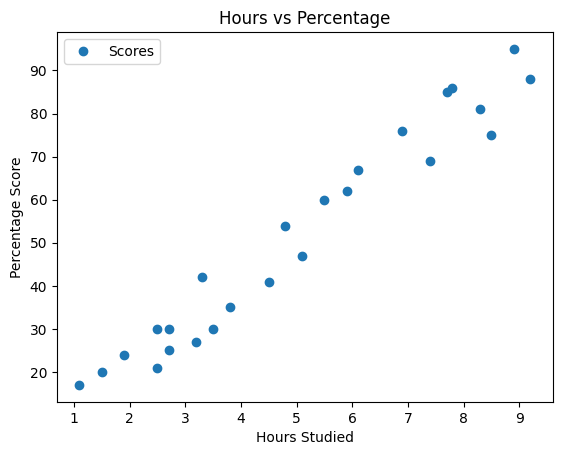

In [24]:
# Plotting the distribution of scores
df.plot(x='Hours',y='Scores',style='o',title='Hours vs Percentage') 
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Linear Regression Model

Now we prepare the data and split it in test data

In [25]:
# Dividing the Data into attributes(input) and labels(output)
X= df.iloc[:, :-1].values  
y = df.iloc[:, 1].values


In [26]:
# Splitting this data into training and test sets by using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Training the model

In [27]:
# Splitting of data into training and testing sets is done, and now is finally the time to train our algorithm.
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


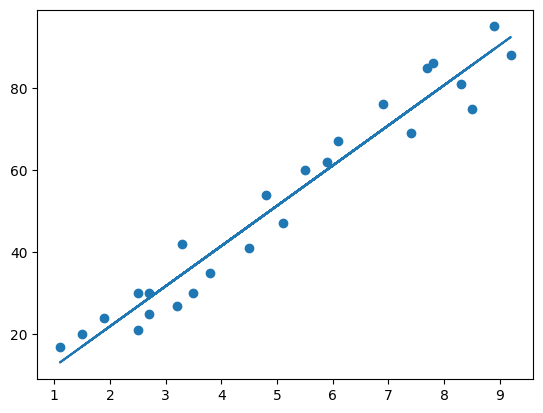

In [28]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Checking the accuracy scores for training and test set

In [29]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training Score')
print(regressor.score(X_train, y_train))

Test Score
0.9568211104435257
Training Score
0.9484997422695115


### Now we make predictions

In [30]:
#  Some predictions after the algorithm is trained
y_pred = regressor.predict(X_test) # Predicting the scores
data= pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
data

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


### Predicting score if a student studies for 9.25 hrs/ day

In [31]:
# Predicting the percentage of the student who studies for 9.25 hrs/day
hours = np.array(9.25)
hours = hours.reshape(-1, 1)
pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056


## Model Evaluation Metrics

In [32]:
# The final step is to evaluate the performance of algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score:',metrics.r2_score(y_test,y_pred))
print('Mean Squared error:',metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error: 4.419727808027652
R2 Score: 0.9568211104435257
Mean Squared error: 22.96509721270043


## Conclusion

##### From the above we have seen that the predicting score of the model is 93.69 with mean absolute error 4.419 .